In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/kermany2018/OCT2017 /val/DRUSEN/DRUSEN-9861332-1.jpeg
/kaggle/input/kermany2018/OCT2017 /val/DRUSEN/DRUSEN-9894035-2.jpeg
/kaggle/input/kermany2018/OCT2017 /val/DRUSEN/DRUSEN-9884539-2.jpeg
/kaggle/input/kermany2018/OCT2017 /val/DRUSEN/DRUSEN-9894035-1.jpeg
/kaggle/input/kermany2018/OCT2017 /val/DRUSEN/DRUSEN-9837663-1.jpeg
/kaggle/input/kermany2018/OCT2017 /val/DRUSEN/DRUSEN-9800172-2.jpeg
/kaggle/input/kermany2018/OCT2017 /val/DRUSEN/DRUSEN-9884539-1.jpeg
/kaggle/input/kermany2018/OCT2017 /val/DRUSEN/DRUSEN-9928043-1.jpeg
/kaggle/input/kermany2018/OCT2017 /val/CNV/CNV-6294785-1.jpeg
/kaggle/input/kermany2018/OCT2017 /val/CNV/CNV-8598714-1.jpeg
/kaggle/input/kermany2018/OCT2017 /val/CNV/CNV-6668596-1.jpeg
/kaggle/input/kermany2018/OCT2017 /val/CNV/CNV-6294785-2.jpeg
/kaggle/input/kermany2018/OCT2017 /val/CNV/CNV-6652117-1.jpeg
/kaggle/input/kermany2018/OCT2017 /val/CNV/CNV-6875371-1.jpeg
/kaggle/input/kermany2018/OCT2017 /val/CNV/CNV-8184974-1.jpeg
/kaggle/input/kermany2

In [2]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.image import imread

import tensorflow as tf

In [3]:
# Path to train and test directories
train_folder = '/kaggle/input/kermany2018/OCT2017 /train'
val_folder = '/kaggle/input/kermany2018/OCT2017 /val'

In [4]:
os.listdir(train_folder)

['DRUSEN', 'CNV', 'NORMAL', 'DME']

In [5]:
os.listdir(val_folder)

['DRUSEN', 'CNV', 'NORMAL', 'DME']

In [6]:
path =os.path.join("/kaggle/input/kermany2018/OCT2017 /", "train", "CNV/CNV-172472-331.jpeg")

In [7]:
import cv2
img  = cv2.imread(path)

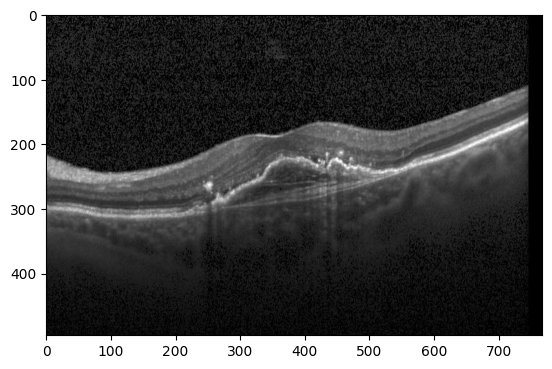

In [8]:
plt.imshow(img);

In [9]:

train_data = tf.keras.utils.image_dataset_from_directory('/kaggle/input/kermany2018/OCT2017 /train',
                                                         seed=42)

Found 83484 files belonging to 4 classes.


In [10]:

val_data = tf.keras.utils.image_dataset_from_directory('/kaggle/input/kermany2018/OCT2017 /val',
                                                       shuffle = False,
                                                       seed=42)

Found 32 files belonging to 4 classes.


In [11]:

test_data = tf.keras.utils.image_dataset_from_directory('/kaggle/input/kermany2018/OCT2017 /test',
                                                         seed=42)

Found 968 files belonging to 4 classes.


In [12]:
directory = '/kaggle/input/kermany2018/OCT2017 /train'

# Get the list of subdirectories (class names)
class_names = os.listdir(directory)

# Dictionary to store the count of images in each class
num_images_per_class = {}

# Iterate over each class
for class_name in class_names:
    # Get the path to the class directory
    class_directory = os.path.join(directory, class_name)
    # Count the number of files (images) in the class directory
    num_images = len(os.listdir(class_directory))
    # Store the count in the dictionary
    num_images_per_class[class_name] = num_images

# Print the number of images in each class
for class_name, num_images in num_images_per_class.items():
    print(f"Train Class '{class_name}': {num_images} images")

    # classes are unbalanced.

Train Class 'DRUSEN': 8616 images
Train Class 'CNV': 37205 images
Train Class 'NORMAL': 26315 images
Train Class 'DME': 11348 images


In [13]:
directory = '/kaggle/input/kermany2018/OCT2017 /test'

class_names = os.listdir(directory)

num_images_per_class = {}


for class_name in class_names:

    class_directory = os.path.join(directory, class_name)
    num_images = len(os.listdir(class_directory))
    num_images_per_class[class_name] = num_images

for class_name, num_images in num_images_per_class.items():
    print(f"Test Class '{class_name}': {num_images} images")

Test Class 'DRUSEN': 242 images
Test Class 'CNV': 242 images
Test Class 'NORMAL': 242 images
Test Class 'DME': 242 images


Above codes will give you 2 datasets where each element is a tuple (image, label), where image is the image data and label is its corresponding class label.

We can also use validation_split parameter here inside of the keras pipeline(default =None). In that case, data will be loaded as train/ validation portions. We want to load whole data here, as we already keep seperate files in our directory to be trained, validated and tested.



In [14]:
data_iterator = train_data.as_numpy_iterator()

In [15]:
data_iterator

In [16]:
batch = data_iterator.next()
# if we run this again, we will get another batch

In [17]:
len(batch) #batch is a dataset (not a dataframe) represent 2 classes as images and labels

2

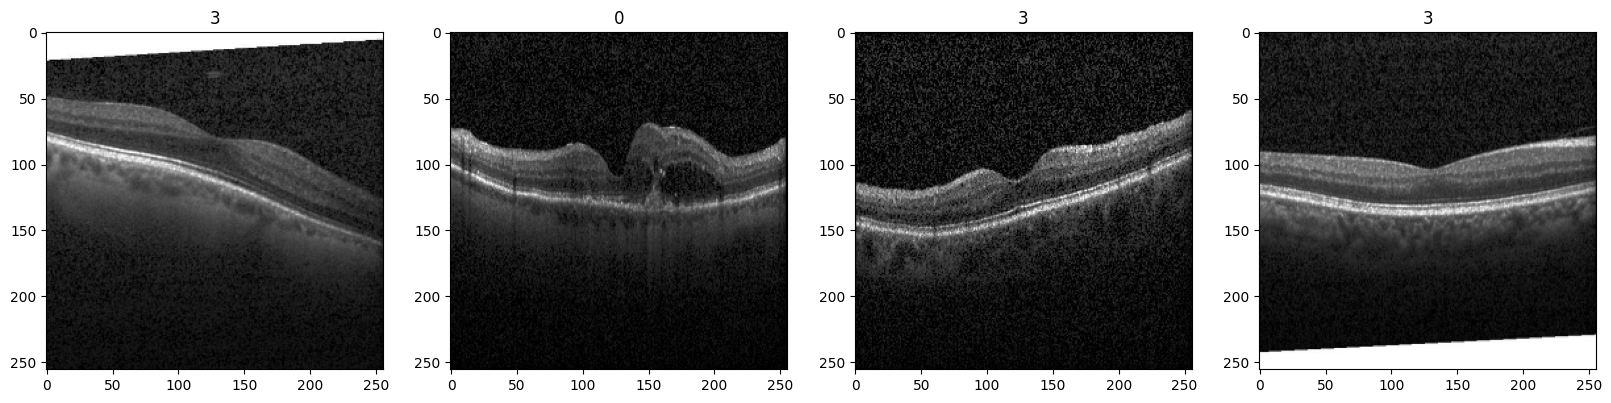

In [18]:
# visualize the train data , first batch, 4 images with labels
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx]);

Images and their corresponding labels
0: DME (Diabetic Macular Edema )
1: CNV (choroidal neovascularization)
2: DRUSEN
3: NORMAL

In [19]:
batch[0] # the 0 index of the batch is our images as numpy array (4D= 3D for shape, 1 for color)

array([[[[2.5500000e+02, 2.5500000e+02, 2.5500000e+02],
         [2.5500000e+02, 2.5500000e+02, 2.5500000e+02],
         [2.5500000e+02, 2.5500000e+02, 2.5500000e+02],
         ...,
         [2.5500000e+02, 2.5500000e+02, 2.5500000e+02],
         [2.5500000e+02, 2.5500000e+02, 2.5500000e+02],
         [2.5500000e+02, 2.5500000e+02, 2.5500000e+02]],

        [[2.5500000e+02, 2.5500000e+02, 2.5500000e+02],
         [2.5500000e+02, 2.5500000e+02, 2.5500000e+02],
         [2.5500000e+02, 2.5500000e+02, 2.5500000e+02],
         ...,
         [2.5500000e+02, 2.5500000e+02, 2.5500000e+02],
         [2.5500000e+02, 2.5500000e+02, 2.5500000e+02],
         [2.5500000e+02, 2.5500000e+02, 2.5500000e+02]],

        [[2.5500000e+02, 2.5500000e+02, 2.5500000e+02],
         [2.5500000e+02, 2.5500000e+02, 2.5500000e+02],
         [2.5500000e+02, 2.5500000e+02, 2.5500000e+02],
         ...,
         [2.5500000e+02, 2.5500000e+02, 2.5500000e+02],
         [2.5500000e+02, 2.5500000e+02, 2.5500000e+02],
  

In [20]:
batch[0].shape

(32, 256, 256, 3)

In [21]:
print(batch[0].min())
print(batch[0].max())

0.0
255.0


In [22]:
scaled = batch[0] /255

In [23]:
scaled 

array([[[[1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
         [1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
         [1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
         ...,
         [1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
         [1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
         [1.00000000e+00, 1.00000000e+00, 1.00000000e+00]],

        [[1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
         [1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
         [1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
         ...,
         [1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
         [1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
         [1.00000000e+00, 1.00000000e+00, 1.00000000e+00]],

        [[1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
         [1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
         [1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
         ...,
         [1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
         [

In [24]:
batch[1] #labels

array([3, 0, 3, 3, 3, 0, 0, 3, 0, 0, 0, 3, 2, 0, 2, 0, 2, 0, 0, 0, 0, 1,
       0, 0, 0, 3, 0, 3, 0, 0, 0, 1], dtype=int32)

Preprocessing

In [25]:
train_data = train_data.map(lambda x,y: (x/255, y))
# map function automatically performs in pipeline
# x represents images and y represents target variable

In [26]:
val_data = val_data.map(lambda x,y: (x/255, y))

In [53]:
test_data = test_data.map(lambda x,y: (x/255, y))

In [27]:
scaled_iterator = train_data.as_numpy_iterator()

In [28]:
batch = scaled_iterator.next()

In [29]:
batch[0].max()

1.0

In [30]:
batch[0].min()

0.0

In [31]:
batch[1] #label encoded>> use sparse_categorical_crossentropy

array([0, 0, 0, 0, 1, 0, 0, 1, 3, 0, 1, 0, 0, 3, 0, 1, 3, 3, 0, 0, 1, 0,
       1, 0, 3, 3, 0, 0, 0, 3, 2, 2], dtype=int32)

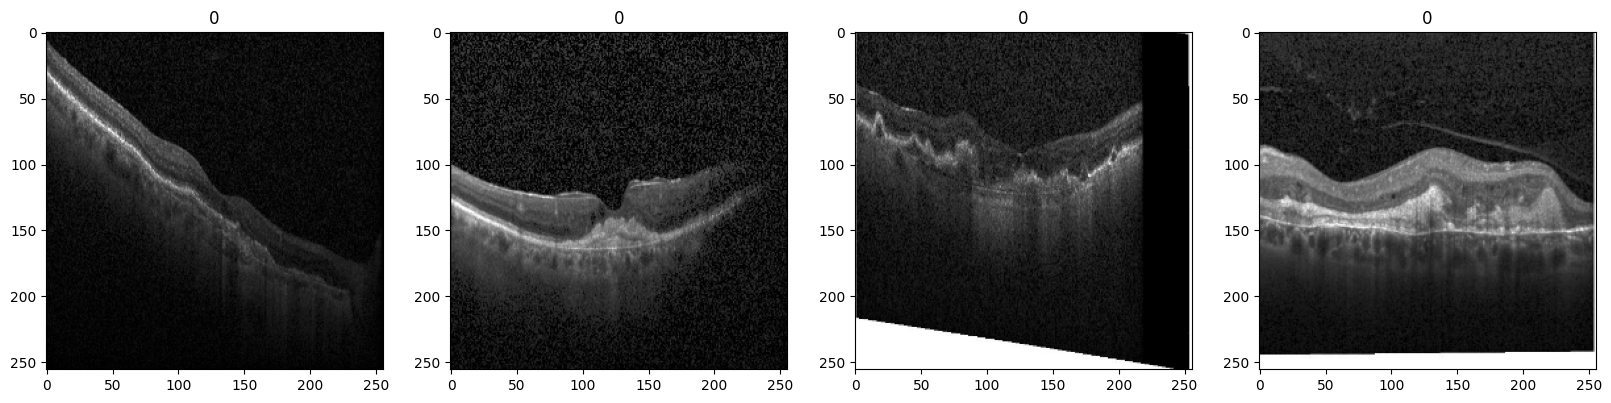

In [32]:
# visualize scaled images
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

    Model Building

In [33]:
len(train_data) #shows batch number

2609

In [34]:
len(val_data)

1

In [35]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D, BatchNormalization

In [36]:
from tensorflow.keras import regularizers

In [39]:
model = Sequential()
model.add(Conv2D(64, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(BatchNormalization())

model.add(Conv2D(128, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(BatchNormalization())

model.add(Conv2D(64, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(BatchNormalization())

model.add(Flatten())

model.add(Dense(512, activation='relu'))
model.add(Dense(4, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


In [40]:
from sklearn.utils import class_weight
# Collect the class labels from the dataset
class_labels = []
for _, label in train_data:
    class_labels.append(label.numpy())

class_labels = np.concatenate(class_labels)

# Compute class weights
class_weights = class_weight.compute_class_weight(class_weight = "balanced",classes = np.unique(class_labels),
                                        y = class_labels)

# Convert class weights to dictionary format
class_weights_dict = dict(enumerate(class_weights))

# Compile the model with class weights
model.compile(optimizer='adam',
              loss=tf.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [41]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 64)      1792      
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 127, 127, 64)      0         
 g2D)                                                            
                                                                 
 batch_normalization_3 (Bat  (None, 127, 127, 64)      256       
 chNormalization)                                                
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 128)     73856     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 62, 62, 128)       0         
 g2D)                                                            
                                                      

In [46]:
from keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [47]:
hist = model.fit(train_data, epochs=40, validation_data=val_data,class_weight=class_weights_dict, callbacks =[early_stopping])

Epoch 1/40
2609/2609 [==============================] - 329s 126ms/step - loss: 0.5737 - accuracy: 0.8050 - val_loss: 1.2492 - val_accuracy: 0.4375
Epoch 2/40
2609/2609 [==============================] - 322s 123ms/step - loss: 0.3910 - accuracy: 0.8676 - val_loss: 0.1032 - val_accuracy: 0.9688
Epoch 3/40
2609/2609 [==============================] - 321s 123ms/step - loss: 0.2820 - accuracy: 0.9066 - val_loss: 0.2352 - val_accuracy: 0.9375
Epoch 4/40
2609/2609 [==============================] - 321s 123ms/step - loss: 0.2198 - accuracy: 0.9272 - val_loss: 0.1313 - val_accuracy: 0.9375
Epoch 5/40
2609/2609 [==============================] - 320s 123ms/step - loss: 0.1798 - accuracy: 0.9399 - val_loss: 0.2462 - val_accuracy: 0.9062
Epoch 6/40
2609/2609 [==============================] - 321s 123ms/step - loss: 0.1437 - accuracy: 0.9517 - val_loss: 0.1623 - val_accuracy: 0.9688
Epoch 7/40
2609/2609 [==============================] - 321s 123ms/step - loss: 0.1207 - accuracy: 0.9621 - val_

In [48]:
hist.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

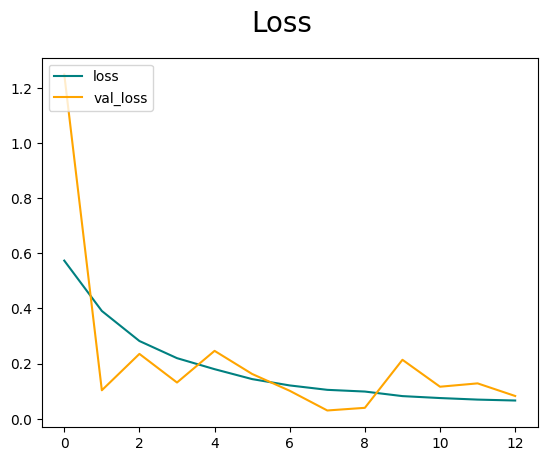

In [49]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

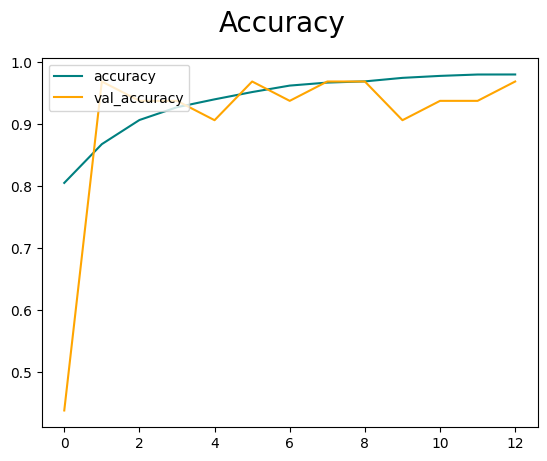

In [50]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

Evaluate

In [51]:
from sklearn.metrics import classification_report, confusion_matrix

1/1 [==============================] - 0s 24ms/step


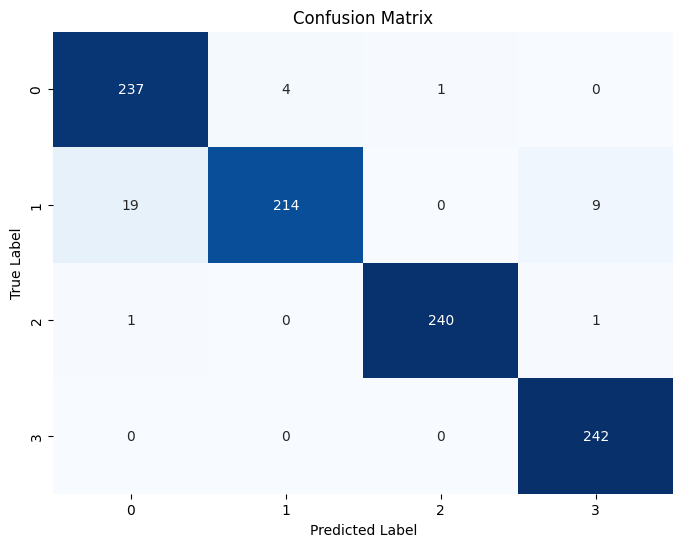

In [54]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Initialize lists to store true and predicted labels
true_labels = []
pred_labels = []

# Iterate over batches in the test data
for batch in test_data.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)

    # Convert predicted probabilities to integer class labels
    pred_labels.extend(np.argmax(yhat, axis=1))

    # Append true labels to the list
    true_labels.extend(y)

# Compute confusion matrix
matrix = confusion_matrix(true_labels, pred_labels)

# Visualize confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [55]:
# Compute classification report
report = classification_report(true_labels, pred_labels)

# Print classification report
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.98      0.95       242
           1       0.98      0.88      0.93       242
           2       1.00      0.99      0.99       242
           3       0.96      1.00      0.98       242

    accuracy                           0.96       968
   macro avg       0.96      0.96      0.96       968
weighted avg       0.96      0.96      0.96       968



If we wanted to use data augmentation, then our code will be like following:
note: I have decided not to use later on, as explained below.

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define data augmentation parameters
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True
)

# Flow training images in batches using train_datagen generator
train_generator = train_datagen.flow_from_directory(
    '/kaggle/input/kermany2018/OCT2017 /train',
    target_size=(256, 256),
    batch_size=32,
    class_mode='categorical',
    shuffle=True,
    seed=42 )


In [ ]:
# Define data augmentation parameters for validation (optional)
val_datagen = ImageDataGenerator(rescale=1./255)

# Flow validation images in batches using val_datagen generator
val_generator = val_datagen.flow_from_directory(
    '/kaggle/input/kermany2018/OCT2017 /val',
    target_size=(256, 256),
    batch_size=32,
    class_mode='categorical',
    shuffle=False,
    seed=42)

#While shuffling training data (shuffle=True) is typically important to introduce randomness and 
#prevent the model from memorizing the order of samples, it's often not necessary for validation data, 
#where the goal is to evaluate the model's generalization performance on unseen data. Therefore,
#it's a common practice to disable shuffling for validation data.

In [ ]:
# since labels are one-hot-encoded, we changed the former loss to CategoricalCrossentropy
model.compile(optimizer='adam',
              loss=tf.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])

In [ ]:
# hist1 = model.fit(train_generator, epochs=10, validation_data=val_generator)
# since we used image generator, it is not cost effective and very time consuming, I decided not to go 
# for it.
# We already have enough data on training set so it might be a good idea to tune parameters instead.
# It is also important to try to balance data out as our classes do not have close numbers of data

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Initialize lists to store true and predicted labels
true_labels = []
pred_labels = []

# Iterate over batches in the test data
for batch in test_data.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)

    # Convert predicted probabilities to integer class labels
    pred_labels.extend(np.argmax(yhat, axis=1))

    # Append true labels to the list
    true_labels.extend(y)

# Compute confusion matrix
matrix = confusion_matrix(true_labels, pred_labels)

# Visualize confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# Compute classification report
report = classification_report(true_labels, pred_labels)

# Print classification report
print("Classification Report:")
print(report)

Transfer Learning


In [56]:
import numpy as np
import keras
from keras import layers
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt

In [58]:

resnet_model = Sequential()

pretrained_model= tf.keras.applications.ResNet152(include_top=False,
                   input_shape=(256,256,3),
                   pooling='avg',
                   weights= None)
for layer in pretrained_model.layers:
        layer.trainable=False

resnet_model.add(pretrained_model)
resnet_model.add(GlobalMaxPooling2D())
resnet_model.add(Flatten())
resnet_model.add(Dense(512, activation='relu'))
resnet_model.add(Dense(4, activation='softmax'))
resnet_model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

NameError: name 'GlobalMaxPooling2D' is not defined

In [57]:
hist1 = resnet_model.fit(train_data, epochs=40, validation_data=val_data,class_weight=class_weights_dict)

NameError: name 'resnet_model' is not defined

In [ ]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [ ]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [ ]:
vgg16_model = Sequential()

pretrained_model= tf.keras.applications.VGG16(
    include_top=True,
    weights="imagenet",
    input_shape=(256,256,3),
    pooling='max',
    classes=4,
    classifier_activation="softmax",
)
for layer in pretrained_model.layers:
        layer.trainable=False

vgg16_model.add(pretrained_model)
vgg16_model.add(Flatten())
vgg16_model.add(Dense(512, activation='relu'))
vgg16_model.add(Dense(4, activation='softmax'))
vgg16_model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

